# Report on the work on task2 for assigmnemt1 

In [2]:
# import necessary modules
import matplotlib.pyplot as plt

### Problem description

In task 1 we developed a genetic algorithm which finds the shortest path in a directed weighted graph from the starting node **S** to the goal node **G**. In task 2 we upgraded this algorithm so that it receives a sequence of target nodes and returns the shortes path through the graph that visits these target nodes in order. 

### Task solving overview

#### Step 1: Generating the initial population

We started solving this task by defining a function that generates an initial population. 

In this function we guarantee that the target nodes are visited in order. If these target nodes are [**S**, **A**, **C**, **B**, **G**], then the path should look like [**S**....**A**....**C**....**B**...**G**] where the four dots represent segments between target nodes. 

We determined the segment size as the number of nodes a graph has since the optimal path between 2 nodes must never be longer than all of the nodes in a graph and we want to converge near or to the optimal path between two consecutive nodes.  

We then implemented a random walk between two successive target nodes (so each segment represents a random walk). We used 2 strategies to prevent loops in the initial population. The first one is adaptive probability where we increased the possibility for a target node to be selected as the segment length grew larger. This means we firstly allowed some wandering in between nodes chich created diversity in paths between same checkpoints. The second strategy was frequency based sampling where we tracked node visits and biased selection of next nodes in random walk towards less visited nodes. This also created diversity and prevented loops. 

#### Step 2: Fitness function

Next we focused on the fitness function.

We decided to punish the individuals which did not have the target nodes visited in the correct order, were invalid and those that had a higher path cost than their counterparts.  

#### Step 3: Custom crossovers

Since the crossovers builtin in the pygad class were making the algorithm converge slower, we decided to implement our own crossover functions.

We implemented 3 functions which all work on the same principle and kep the validity of the paths.

Our first crossover custom_crossover_1 does 1-split crossover. It takes two random parents from the population and assembles the child taking the first part from the first parent and the second part from the second parent. This function makes 1 offspring per 2 parents.

Our second function custom_crossover_2 does 2-split crossover. It takes two random parents from the population and assembles the first child taking the first part from the first parent, the second part from the second parent and the third part again from the first parent. It assembles the second child i a similar manner only using different parts of parents. This function makes 2 offspring per 2 parents.

Our third function custom_crossover_3 does 2-split crossover. It takes three random parents from the population and assembles the first child taking the first part from the first parent, the second part from the second parent and the third part from the third parent. It assembles the second child i a similar manner only using different parts of parents. This function makes 2 offspring per 3 parents.


#### Step 4: Custom mutation

Next up we focused on making our custom mutation. 

We implemented 1 mutation function which keeps validity of paths. 

Our function custom_mutation firstly chooses a random segment in an individual (a path between 2 successive target nodes: **A**, **C**) where it will mutate one node. It then chooses this node randomly and replaces it. The node is replaced by a random neighbour of the parenting node. If the next target node is in the neighbours it will be surely selected 20% of time and the other 80% of time we will select a random neighbour (this could also be the target node). Our mutation is finished once we ensure validity of the individual so once the mutated node's random walk stumbles on to the target node **C** (which is a successor of **A** by our target nodes declaration).



#### Step 5: Finding optimal configurations for running the genetic algorithm

Firstly we generated multiple configurations. Then we ran our genetic algorithm for each configuration multiple times. We used the following parameters so that the testing was efficient and fast: 
- population size = 30
- number of generations = 100
- number of parents mating = 10


Our configurations were tested on 3 different almost full graphs (probability of a link between 2 nodes = 0.8) and for each graph on 4 different initial populations (generated with our initial_population_checkpoint_walk function). This holds for all further testing exept for the final optimal test. 

We started by finding the optimal mutation probabilities for cutom_mutation. We defined 5 configurations for the genetic algorithm which looked like this:


In [ ]:
config = {
        'crossover_type': custom_crossover_1,
        'mutation_type': custom_mutation,
        'crossover_probability': 0.8,
        'mutation_probability': [0.2, 0.4, 0.6, 0.8, 1.0], # of course there was only one probability per configuration
        'parent_selection_type': 'rank'
    }

In [ ]:
# read the graphs
mp_graph = plt.imread("optimal_parameters_search/mp_search/optimal_mutation_probability_for_custom_mutation_graph.png")
mp_bar = plt.imread("optimal_parameters_search/mp_search/optimal_mutation_probability_for_custom_mutation_bar.png")

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

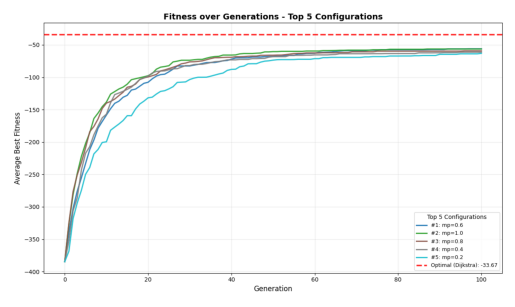

In [9]:
plt.imshow(mp_graph)
plt.axis('off')

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

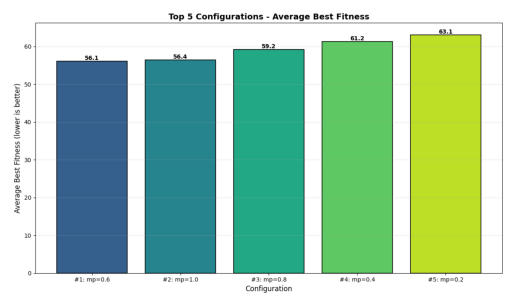

In [8]:
plt.imshow(mp_bar)
plt.axis('off')

As seen from the graphs the optimal mutation probability is 0.6. Though we did not test on all possible configurations (due to processor capability constraint) we estimated this to be the optimal mutation probability. 

Furthermore we tested the crossover types. We wanted to find out which of our custom crossovers worked the best and to make sure builtin crossovers were worse we also included some of those. The configurations looked like this: 

In [ ]:
config = {
        'crossover_type': [custom_crossover_1, custom_crossover_2, custom_crossover_3],
        'mutation_type': custom_mutation,
        'crossover_probability': 0.8,
        'mutation_probability': 0.6, # determined from before
        'parent_selection_type': 'rank'
    }

In [11]:
# read the graphs
ct_graph = plt.imread("optimal_parameters_search/ct_search/optimal_crossover_type_graph.png")
ct_bar = plt.imread("optimal_parameters_search/ct_search/optimal_crossover_type_bar.png")

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

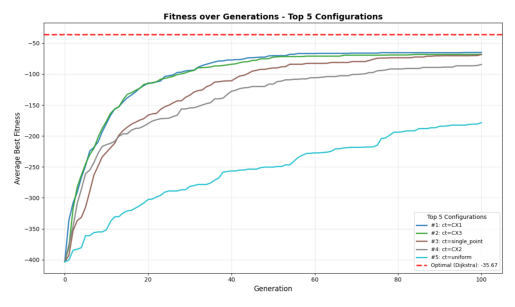

In [13]:
plt.imshow(ct_graph)
plt.axis('off')

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

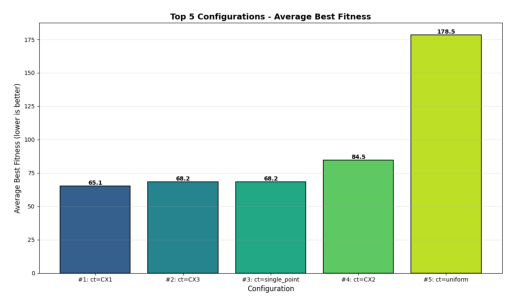

In [14]:
plt.imshow(ct_bar)
plt.axis('off')

It is obvious that our custom_corssover_1 function and our custom_crossover_3 function worked best. What is surprising is that the builtin single_point crossover also worked quite well despite not ensuring valid paths. Also notable is the inefficiency of the uniform crossover and the relative closeness of custom_crossover_2 to the top 3 crossovers. We will be using custom_crossover_1 in the following configurations. 

Moreover we tested the crossover probability. the configuration looks similar to the one for mutation probability testing: 

In [ ]:
config = {
        'crossover_type': custom_crossover_1, # determined from before
        'mutation_type': custom_mutation,
        'crossover_probability': [0.2, 0.4, 0.6, 0.8, 1.0],
        'mutation_probability': 0.6,  # determined from before
        'parent_selection_type': 'rank'
    }

In [21]:
# read the graphs
cp_graph = plt.imread("optimal_parameters_search/cp_search/optimal_crossover_probability_for crossover_1_graph.png")
cp_bar = plt.imread("optimal_parameters_search/cp_search/optimal_crossover_probability_for crossover_1_bar.png")

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

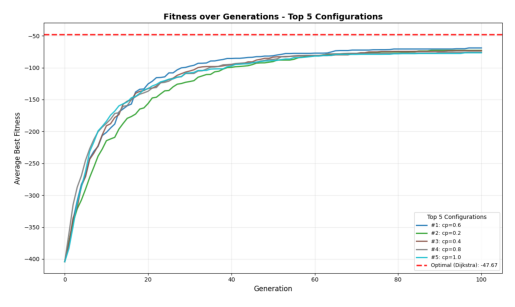

In [23]:
plt.imshow(cp_graph)
plt.axis('off')

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

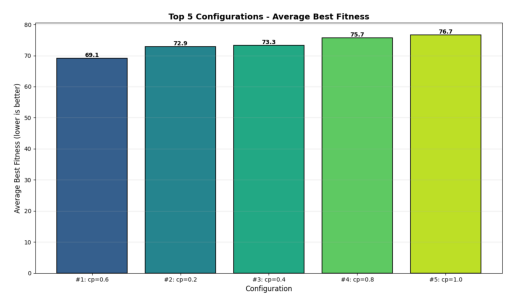

In [24]:
plt.imshow(cp_bar)
plt.axis('off')

As it turns out the best crossover probability is 0.6. This is what we will be using in the following configurations.

The last testing for parameters was for the optimal parent selection type. We chose some builtin functions for this. The configuration: 

In [ ]:
config = {
        'crossover_type': custom_crossover_1, # determined from before
        'mutation_type': custom_mutation,
        'crossover_probability': 0.6, # determined from before
        'mutation_probability': 0.6,  # determined from before
        'parent_selection_type': ['rank', 'tournament', 'sss', 'random', 'rws']
    }

In [25]:
# read the graphs
pst_graph = plt.imread("optimal_parameters_search/pst_search/optimal_pst_graph.png")
pst_bar = plt.imread("optimal_parameters_search/pst_search/optimal_pst_bar.png")

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

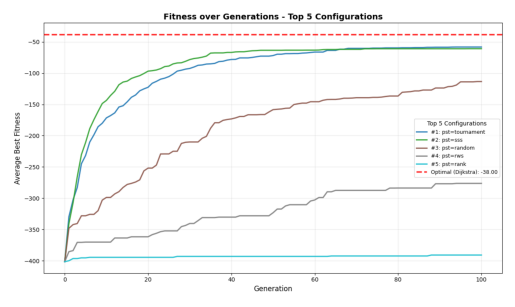

In [27]:
plt.imshow(pst_graph)
plt.axis('off')

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

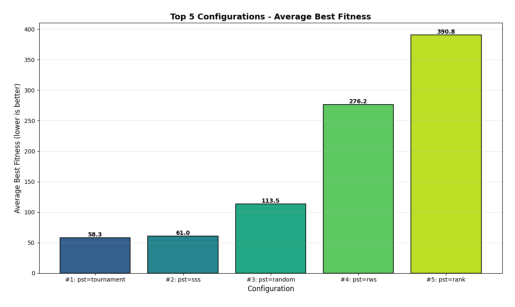

In [26]:
plt.imshow(pst_bar)
plt.axis('off')

We can observe that the tornament selection and the steady state selection were almost tied at the first place. But since the winner was tournament selection we will be using it in the optimal configuration. 

With the quick testing done we constructed the "optimal" configuration. The configuration:

In [ ]:
config = {
        'crossover_type': custom_crossover_1, # determined from before
        'mutation_type': custom_mutation,
        'crossover_probability': 0.6, # determined from before
        'mutation_probability': 0.6,  # determined from before
        'parent_selection_type': 'tournament'
    }

We then set the new parameters as follows:
- population size = 2*number_nodes_in_graph
- number of generations = 100
- number of parents mating = number_nodes_in_graph

Our "optimal" configuration was tested on 3 different almost full graphs (probability of a link between 2 nodes = 0.8, graphs with 10, 30 and 50 nodes) and for each graph on 30 different initial populations (generated with our initial_population_checkpoint_walk function).

(np.float64(-0.5), np.float64(1188.5), np.float64(689.5), np.float64(-0.5))

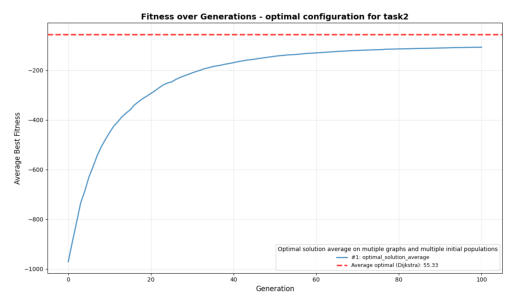

In [29]:
optimal_config_graph = plt.imread("optimal_parameters_search/optimal_solution_graph.png")
plt.imshow(optimal_config_graph)
plt.axis('off')

We also remarked the number of optimal path calculations. In this testing it was 6. Which means our genetic algorithm found the optimal path through target nodes in 6 cases. 